# Prueva de Modelos matemáticos y predicciones

## Nombre:Edison Huinaizaca

## Formulación del Problema

•	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
◦	Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:
▪	Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).
▪	Generar un modelo probabilistico con los datos.
▪	Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones
•	Cual tiene una mejor prediccion
•	Ventajas y desventajas de los modelos.
•	Cual es el principal problema del modelo probabilistico

## Definición del sistema 


In [185]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


## Coleccion de dataos

In [101]:
# Descarga de los datos (URL)
url = 'http://cowid.netlify.com/data/full_data.csv'
df = pd.read_csv(url)
df

date     location  new_cases  new_deaths  total_cases  \
0     2020-02-25  Afghanistan        NaN         NaN            1   
1     2020-02-26  Afghanistan        0.0         NaN            1   
2     2020-02-27  Afghanistan        0.0         NaN            1   
3     2020-02-28  Afghanistan        0.0         NaN            1   
4     2020-02-29  Afghanistan        0.0         NaN            1   
...          ...          ...        ...         ...          ...   
2862  2020-03-13        World     7488.0       338.0       132758   
2863  2020-03-14        World     9761.0       433.0       142534   
2864  2020-03-15        World    10967.0       343.0       153517   
2865  2020-03-16        World    13971.0       855.0       167506   
2866  2020-03-17        World    11594.0       819.0       179112   

      total_deaths  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
2862        4956.0  
2863        5392.0  
2864        5735.0  
2865        6606.0  
2866        7426.0  

[2867 rows x 6 columns]


## Implementación del modelo 
en esta seccion se prosede a seleccionar y analisar loas datos requeridos para su posteriornalisis
## Datos positivos

In [102]:
df = df[df['location'].isin(['Canada'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

date  total_cases
426    26            1
427    27            2
428    28            3
429    29            3
430    30            3
431    31            4
432    32            4
433    33            4
434    34            4
435    35            5
436    36            5
437    37            7
438    38            7
439    39            7
440    40            7
441    41            7
442    42            7
443    43            7
444    44            7
445    45            7
446    46            7
447    47            7
448    48            8
449    49            8
450    50            8
451    51            8
452    52            8
453    53            9
454    54            9
455    55           10
456    56           10
457    57           11
458    58           11
459    59           14
460    60           19
461    61           19
462    62           27
463    63           30
464    64           30
465    65           45
466    66           51
467    67           57
468    68           62
469    69           77
470    70           93
471    71           93
472    72          138
473    73          176
474    74          244
475    75          304
476    76          424

## Grafica


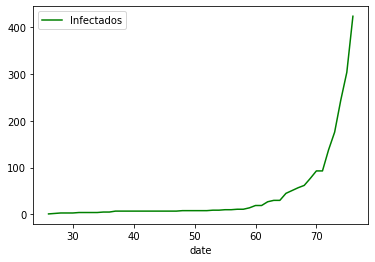

In [103]:
df.plot(x ='date', y='total_cases', linestyle='-', color='g', label = "Infectados")



##  modelo lineal

- Calculo de Error medio y el valor que corta en el eje y 
- Calculo  en el caso de los Recuperados

In [173]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)


print('Coefficients: \n', regr.coef_)

print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [3.52895928]
Independent term: 
 -138.4475113122172


## Calculo de la prediccion
### Prediccion en el caso de los Recuperados

In [168]:
#Vamos a comprobar:
#prediccion dentro de 7 dias
y_prediccion = regr.predict([[7]])
print("prediccion dentro de 7 dias de n infectados:")
print(int(y_prediccion))

prediccion dentro de 7 dias de n infectados:
-113


## Grafica infectados

[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


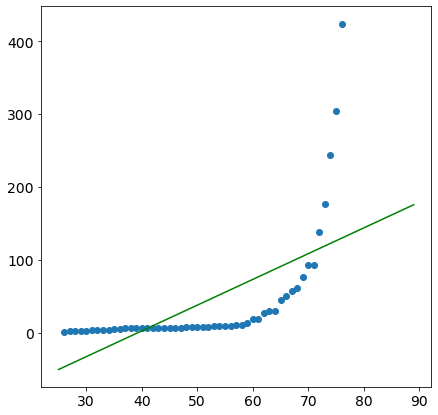

In [169]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(25, 90))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

# El modelo logistico

In [177]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print("prediccion dentro de 7 dias de n infectados:")
print(exp_fit)

prediccion dentro de 7 dias de n infectados:
(array([-539.98715727,  149.62019254]), array([[14486.67082522, -3704.08976009],
       [-3704.08976009,   953.03668259]]))


## Graficas
### Grafica Infectados

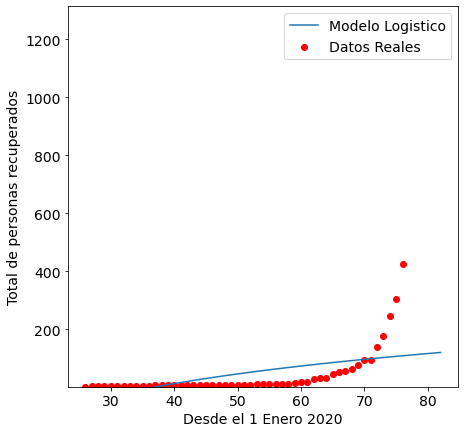

prediccion dentro de 7 dias de n infectados:
[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]


In [178]:
pred_x = list(range(min(x),max(x)+7)) # Predecir 7 dias
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas recuperados")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()
print("prediccion dentro de 7 dias de n infectados:")
print(pred_x)

# Modelo exponencial
## Grafica Y prediccion

[ 0.08604062 -1.76736218]
prediccion dentro de 7 dias de n infectados:
[26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82]


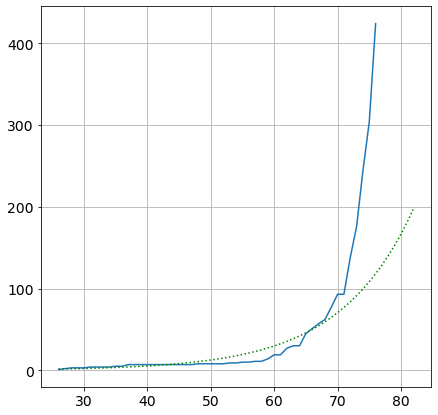

In [179]:
curve_fit = np.polyfit(x,np.log(y),deg=1)
print(curve_fit)
pred_x = np.array(list(range(min(x),max(x)+7)))#prediccion de infectados dentro de 7 dias
yx = np.exp(curve_fit[1])* np.exp(curve_fit[0]*pred_x)
plt.plot(x,y,"-")
plt.plot(pred_x,yx,color="green",linestyle=':')
plt.grid(True)
print("prediccion dentro de 7 dias de n infectados:")
print(pred_x)

# Modelo polinomial
## Grafica y prediccion

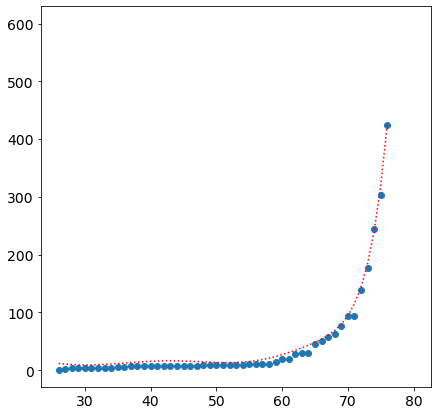

prediccion dentro de 7 dias de n infectados:
[[ 11.34382592]
 [ 10.30647162]
 [  9.55292458]
 [  9.08639114]
 [  8.89978562]
 [  8.97597359]
 [  9.28842941]
 [  9.80229137]
 [ 10.47578375]
 [ 11.26196155]
 [ 12.11072116]
 [ 12.97100879]
 [ 13.79314838]
 [ 14.53120274]
 [ 15.14527535]
 [ 15.60365677]
 [ 15.88471824]
 [ 15.97845746]
 [ 15.8876064 ]
 [ 15.62821997]
 [ 15.22967735]
 [ 14.73404439]
 [ 14.19476724]
 [ 13.67469359]
 [ 13.24344915]
 [ 12.97423422]
 [ 12.94014727]
 [ 13.21019146]
 [ 13.84517465]
 [ 14.8937752 ]
 [ 16.38911431]
 [ 18.34625133]
 [ 20.76110176]
 [ 23.61136903]
 [ 26.86017998]
 [ 30.46322237]
 [ 34.38029852]
 [ 38.59233545]
 [ 43.12502646]
 [ 48.0804237 ]
 [ 53.67795621]
 [ 60.30651247]
 [ 68.58940204]
 [ 79.46419753]
 [ 94.27965524]
 [114.91212219]
 [143.90405806]
 [184.6275334 ]
 [241.47581099]
 [320.08637522]
 [427.59904544]]
Raíz del Error Cuadrático Medio: 7.87540940544786
Coeficiente de Determinación R2: 0.9905236254852791


In [165]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

x = df.iloc [:, 0].values.reshape(-1, 1) # necesitamos un array de 2D para SkLearn
y = df.iloc [:, 1].values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#función polinomial de orden 2    
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
 
#plt.scatter(x, y)
#plt.plot(x, y_pred, color='r',linestyle=':')
#plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
#print ('Raíz del Error Cuadrático Medio: ' + str(rmse))
#print ('Coeficiente de Determinación R2: ' + str(r2))

#función polinomial de orden 3
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x)
     
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
     
#plt.scatter(x, y)
#plt.plot(x, y_pred, color='r',linestyle=':')
#plt.show()
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
#print ('Raíz del Error Cuadrático Medio: ' + str(rmse))
#print ('Coeficiente de Determinación R2: ' + str(r2))

#función polinomial de orden 10
poly = PolynomialFeatures(degree=10, include_bias=False,)
x_poly = poly.fit_transform(x)
     
model.fit(x_poly, y)
y_pred = model.predict(x_poly)+7#prediccion dentro de 7 dias
     
plt.scatter(x, y)
plt.plot(x, y_pred,80,600, color='r',linestyle=':')
plt.show()
     
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print("prediccion dentro de 7 dias de n infectados:")
print(y_pred)
print ('Raíz del Error Cuadrático Medio: ' + str(rmse))
print ('Coeficiente de Determinación R2: ' + str(r2))

## El modelo basado en probabilidad

In [180]:
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df
df = df.loc[:,['date','Canada']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

date  Canada
0      -1       0
1       0       0
2       1       0
3       2       0
4       3       0
..    ...     ...
324   323    4641
325   324    4642
326   325    4968
327   326    4992
328   327    4792

[329 rows x 2 columns]

In [181]:

filtro = df["Canada"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
#y = list(df.iloc [:, 1]) 
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)

780.0
1233.160447761194


In [182]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.

url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion para 7 dias 
prediccion_siguiente = int(y[-7] + mediana)
print("prediccion dentro de 7 dias de n infectados:")
print(prediccion_siguiente)

181456


# Grafica 

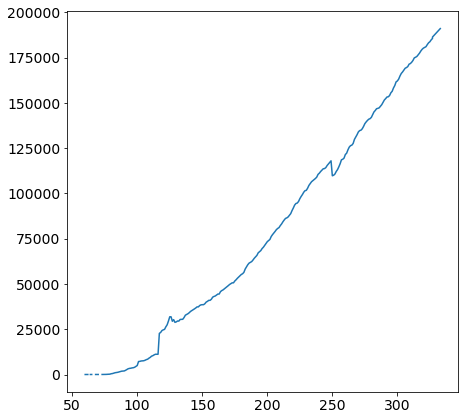

In [183]:
# Aqui se obtendra la predicion a 7 dias
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()

## Cual tiene una mejor prediccion
el que tiene un resultado mejor es el modelo polinomial n grado 10
## Ventajas y desventajas de los modelos.
Ventajas

  - Requieren menos tiempo y es menos caro que experimentar con el objeto o la situación real.
  - Permiten una identificación rápida de las expectativas esperadas
  - Reducen los riesgos asociados con la experimentación real
  - Ayda a tener una vision mas detallada del problema
  - Puede dar una prediccion que se aserque ala realidad
  
Desventajas

  - Se pierde información (que puede ser relevante) del fenómeno que se esta estudiando.
  - Las diferentes interpretaciones de la información, pueden ocasionar resultados que estén lejos de la realidad.
  - La recolección de datos puede ser muy costosa y complicada.
  - Sensibilidad ante errores de medición; a veces pequeñas variaciones en los datos ocasionan que se tengan resultado    opuestos.

## Cual es el principal problema del modelo probabilistico
Uno delos problemas del modelo probabilistico es que nesesita una fuente dedatos robusta para poder asercarse lo mas posible a una prediccion a futuro
